In [1]:
 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gempy.plot import visualization_2d_pro as vv

## Model interpolation

In [3]:
# Data Preparation
path_to_data = os.pardir+"/../data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[10,10,10], 
                        path_o = path_to_data + "model5_orientations.csv",
                        path_i = path_to_data + "model5_surface_points.csv") 

Active grids: ['regular']


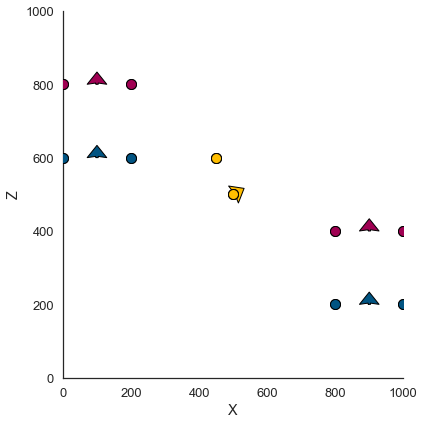

In [4]:
gp.plot.plot_data(geo_data)

[ 800. 1000.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 50.        ,  50.        ,  50.        ],
       [ 50.        ,  50.        , 150.        ],
       [ 50.        ,  50.        , 250.        ],
       ...,
       [750.        , 950.        , 885.99523873],
       [850.        , 950.        , 865.61739633],
       [950.        , 950.        , 877.27349913]])

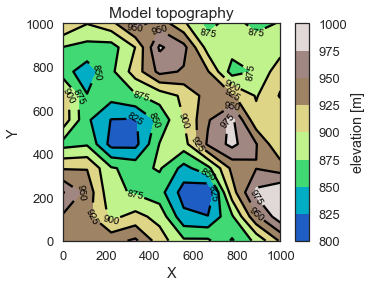

In [5]:
geo_data.set_topography()

In [6]:
section_dict = {'section1':([0,0],[1000,1000],[100,80]),
                 'section2':([800,0],[800,1000],[150,100]),
                 'section3':([50,200],[100,500],[200,150])} 

In [7]:
geo_data.set_section_grid(section_dict)

Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
section1,"[0, 0]","[1000, 1000]","[100, 80]",1414.213562
section2,"[800, 0]","[800, 1000]","[150, 100]",1000.000000
section3,"[50, 200]","[100, 500]","[200, 150]",304.138127


In [8]:
geo_data.grid.sections

,start,stop,resolution,dist
section1,"[0, 0]","[1000, 1000]","[100, 80]",1414.213562
section2,"[800, 0]","[800, 1000]","[150, 100]",1000.000000
section3,"[50, 200]","[100, 500]","[200, 150]",304.138127


In [9]:
gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [10]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')})
geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False
Basement,False,False


In [11]:
geo_data.grid.active_grids

array([ True, False,  True,  True, False])

In [12]:
gp.compute_model(geo_data);

../../../gempy/core/solution.py:266: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


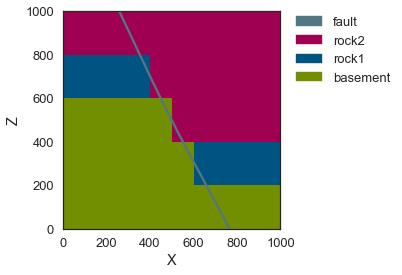

In [13]:
# old plotting api
gp.plot.plot_section(geo_data, 0)

../../../gempy/plot/visualization_2d.py:208: UserWarning: the orientations are not converted to apparent dip.
  warnings.warn('the orientations are not converted to apparent dip.')


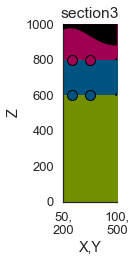

In [14]:
# old plotting api
gp.plot.plot_section_by_name(geo_data, 'section3', show_all_data=True)

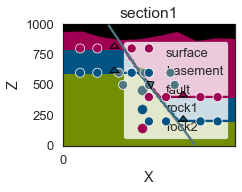

In [15]:
# new plotting api
gp._plot.plot_2d(geo_data, section_names = 'section1')

### Plot2d-Pro: Granular interface:

#### One plot

In [16]:
# from importlib import reload
# reload(vv)
# p = vv.Plot2D(geo_data)
# p.create_figure((7, 7))

In [17]:
p = gp._plot.plot_2d(geo_data)

<Figure size 432x288 with 0 Axes>

In [18]:
p.fig

<Figure size 432x288 with 0 Axes>

In [19]:
sec_name = 'section1'

a = p.add_section(sec_name)

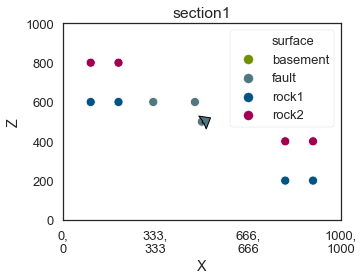

In [20]:
p.plot_data(a, sec_name, projection_distance=200)
p.fig

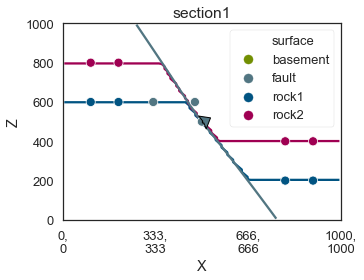

In [21]:
p.plot_contacts(a, sec_name)
p.fig

In [22]:
p.plot_lith(a, sec_name)
p.plot_topography(a, sec_name)

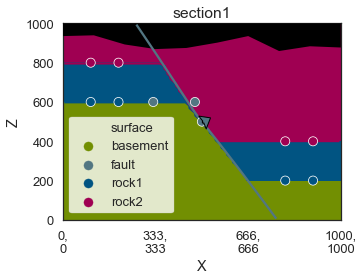

In [23]:
p.fig

#### Several plots

223


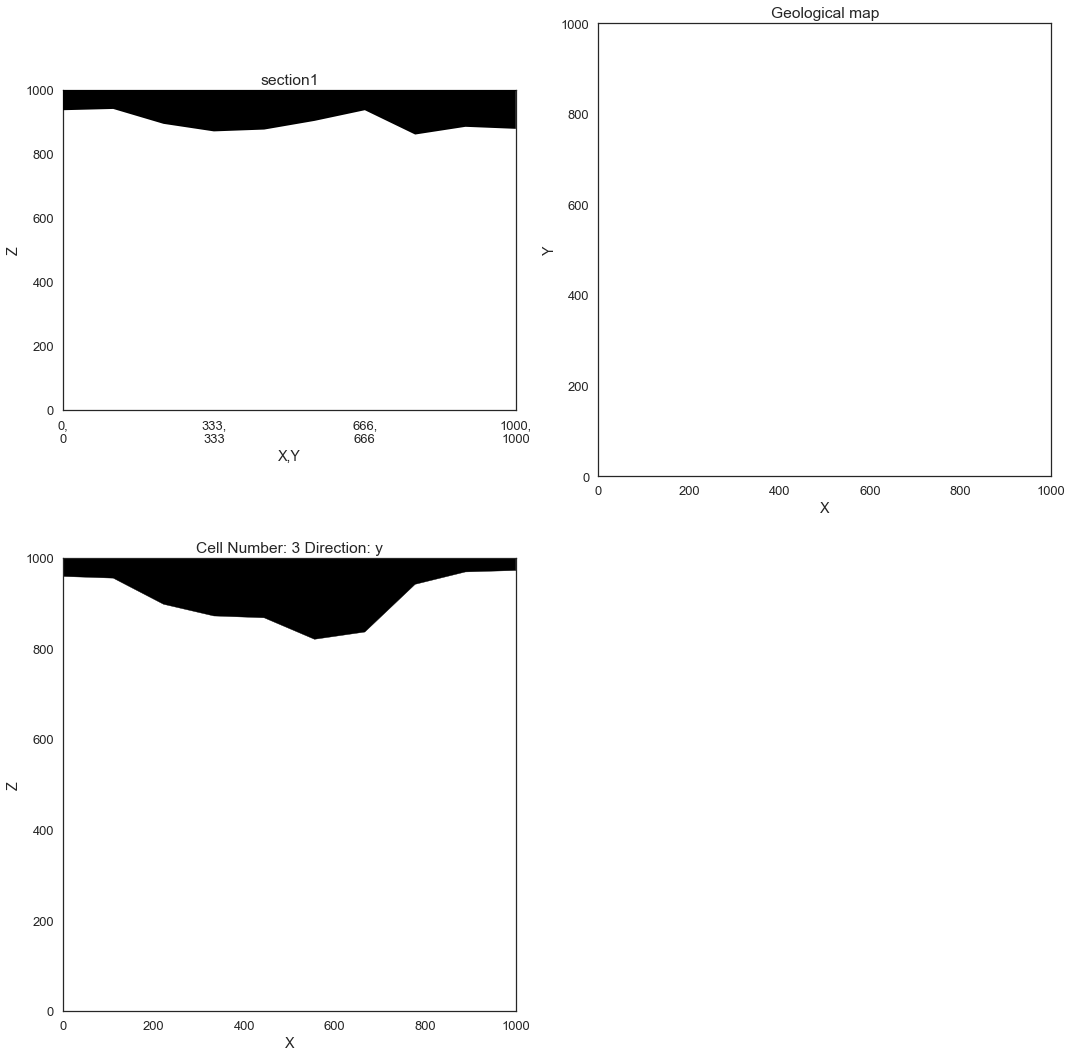

In [24]:

sec_name = 'section1'
sec_name_2 = 'section3'


p2 = gp._plot.plot_2d(geo_data, n_axis = 3, figsize=(15,15), # General fig options
                     section_names=[sec_name,'topography'], cell_number=[3], # Defining the sections
                     show_data=False, show_lith=False, show_scalar=False, show_boundaries=False) 

In [26]:

# Create the section. This loacte the axes and give the right
# aspect ratio and labels

a = p2.add_section(sec_name_2, ax_pos=224)
# b = p2.add_section(cell_number=3, ax_pos=222)
# t = p2.add_section('topography', ax_pos= 224)

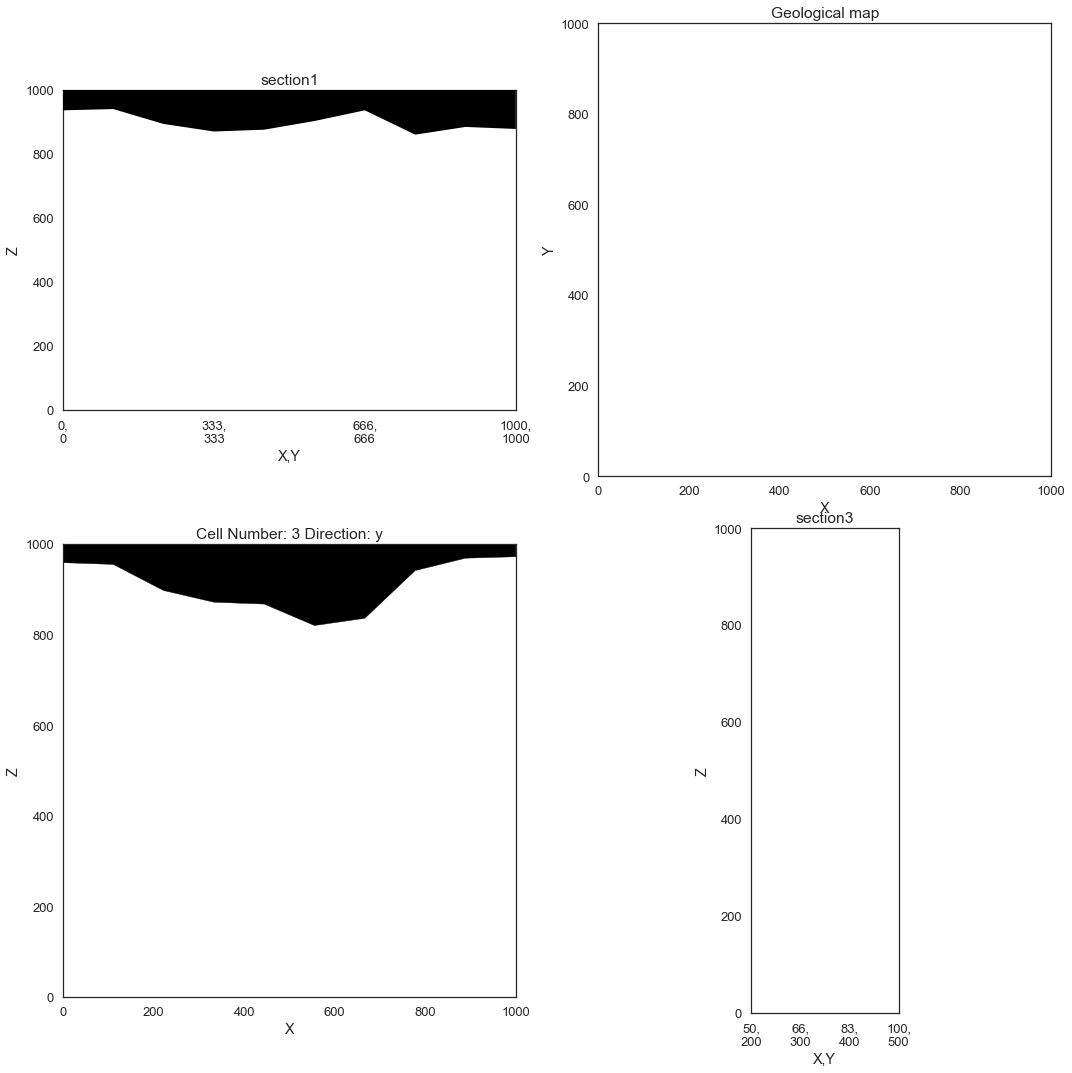

In [27]:
p2.fig

In [28]:
# Axes 0
p2.plot_contacts(a, sec_name_2)
p2.plot_lith(a, sec_name_2)
p2.plot_data(a, sec_name_2, projection_distance=200)
p2.plot_topography(a, sec_name_2)

# # Axes 1
p2.plot_contacts(p2.axes[0], cell_number=3)
#p2.plot_lith(p2.axes[0], cell_number=3)
p2.plot_scalar_field(p2.axes[0], cell_number=3, sn=1)
#p2.plot_topography(p2.axes[0], cell_number=2)

# #axes2.
p2.plot_lith(p2.axes[1], 'topography')
#p2.plot_scalar_field(p2.axes[1], 'topography', sn=1)
#p2.plot_data(t, 'topography')
p2.plot_contacts(p2.axes[1], 'topography')

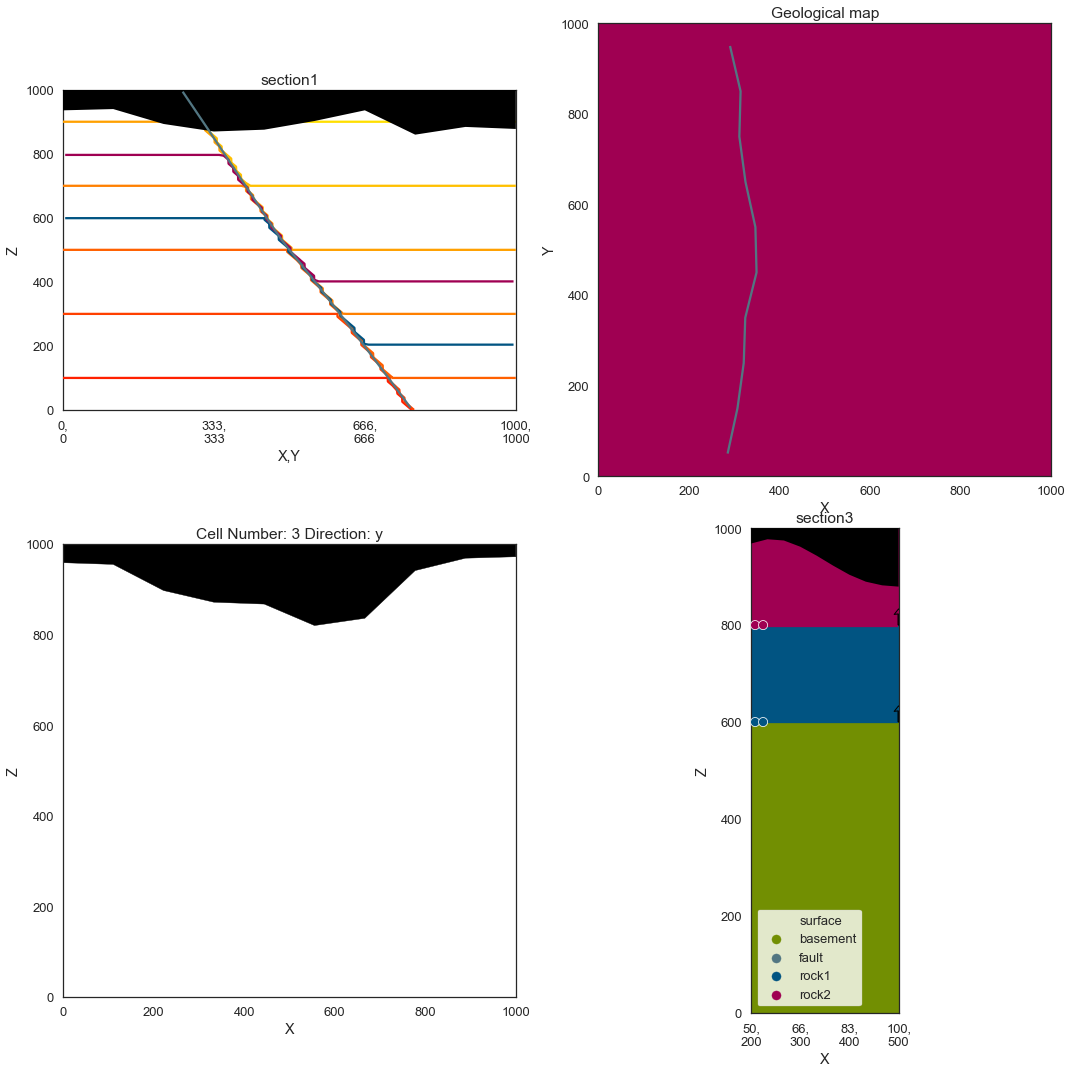

In [29]:
p2.fig

##### Plotting traces:

In [30]:
p2.plot_section_traces(p2.axes[1])

86.60869666537383


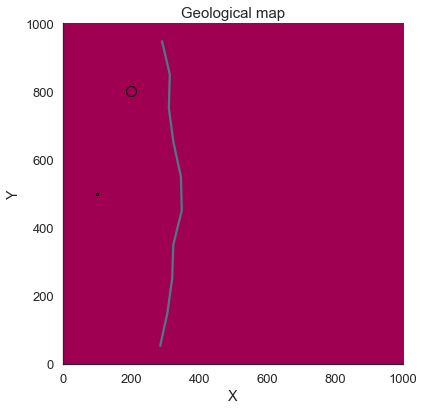

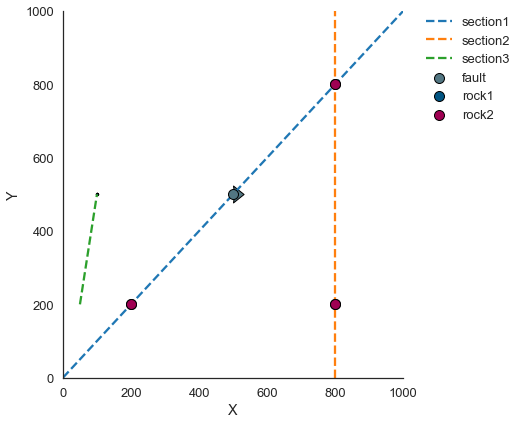

In [31]:
gp.plot.plot_section_traces(geo_data)

### Plot API

If nothing is passed, a Plot2D object is created and therefore you are in the same situation as above:

In [32]:
p3 = gp._plot.plot_2d(geo_data)


<Figure size 432x288 with 0 Axes>

Alternatively you can pass section_names, cell_numbers + direction or any combination of the above:

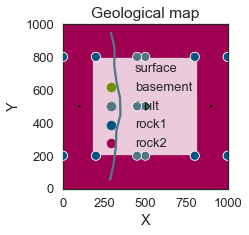

In [33]:
gp._plot.plot_2d(geo_data, section_names=['topography'])

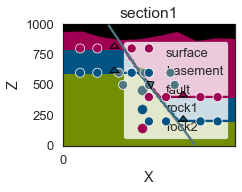

In [34]:
gp._plot.plot_2d(geo_data, section_names=['section1'])

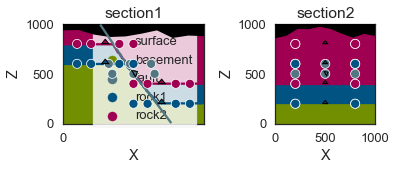

In [35]:
gp._plot.plot_2d(geo_data, section_names=['section1', 'section2'])

324


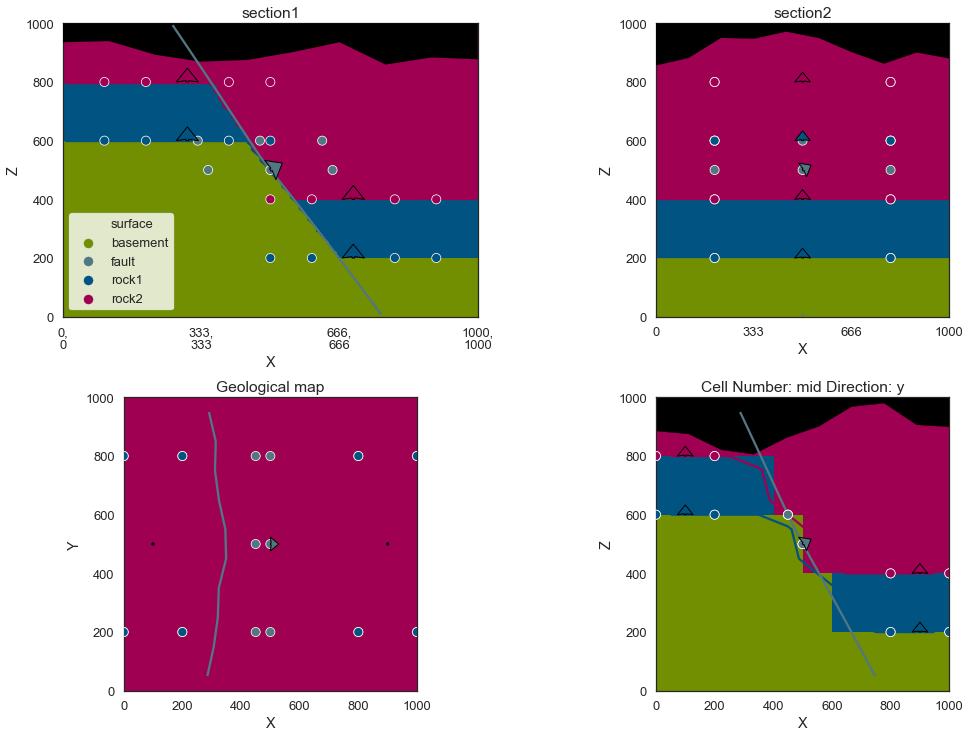

In [36]:
gp._plot.plot_2d(geo_data, figsize=(15,15), section_names=['section1', 'section2', 'topography'],
                 cell_number='mid')